# Result visualization of Multiple telescopes scheduling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
def data_reader(file_dir, length):
    col_names = ['No', 'Duration', 'Slew time', 'Wait time', 'Obs time', 'Rel slew', 'Rel wait', 'Rel obs', 'Max attempts',
             'Times max att', 'Obs result 1', 'Obs result 2', 'Obs result 3', 'Obs result 4', 'Interruption 1', 'Interruption 2']
    data = pd.read_csv(file_dir, names=col_names)
    data = data.to_numpy()
    return data[length,:]

## Dataset 2

In [3]:
dataset = 'dataset2'

### Reschedule step test
Parameters: \
2-4 step: 12 neighbours each time; Multiple tsp polucy; 2 telescopes\
1 step: 10 neighbours each time;

In [21]:
policy = 'tsp2'
step1tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

In [22]:
policy = '2steptsp2'
step2tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

In [23]:
policy = '3steptsp2'
step3tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

In [24]:
policy = '4steptsp2'
step4tsp_data = np.zeros([11, 2, 16])
for i in range(11):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

Text(0.5, 1.0, 'Average Integration Time vs. Reschedule Step')

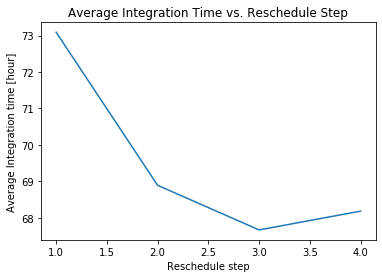

In [25]:
x = [1,2,3,4]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1]]
    
plt.plot(x,y)

plt.xlabel('Reschedule step')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Reschedule Step')

### Number of telescopes performance analysis

#### Simple ShortestSlew policy

In [23]:
policy = 'ShortestSlew'
ShortestSlew_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
ShortestSlew_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    ShortestSlew_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    ShortestSlew_mean[j-1,:] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

Text(0.5, 1.0, 'Average Integration Time vs. Number of Telescopes, ShortestSlew')

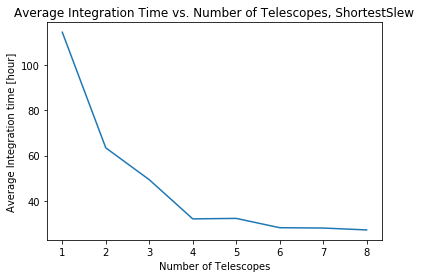

In [24]:
x = [1,2,3,4,5,6,7,8]
y = [1,2,3,4,5,6,7,8]
for i in range(8):
    y[i] = ShortestSlew_mean[i,1]
    
plt.plot(x,y)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes, ShortestSlew')

Text(0.5, 1.0, 'Average Integration Time vs. Number of Telescopes, ShortestSlew')

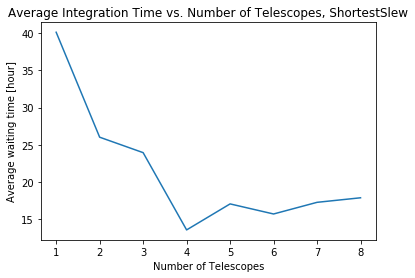

In [25]:
x = [1,2,3,4,5,6,7,8]
y = [1,2,3,4,5,6,7,8]
for i in range(8):
    y[i] = ShortestSlew_mean[i,3]
    
plt.plot(x,y)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average waiting time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes, ShortestSlew')

In [26]:
policy = 'tsp'
tsp_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'tsp1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tsp_mean[0,:] = np.mean(data_reader(file_dir,range(5,10)).astype(np.float), axis=0)
for j in range(2,4):
    tsp_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tsp_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tsp_mean[j-1,:] = np.mean(np.mean(tsp_data, axis=0), axis=0)

Text(0.5, 1.0, 'Average Integration Time vs. Number of Telescopes, Multiple TSP')

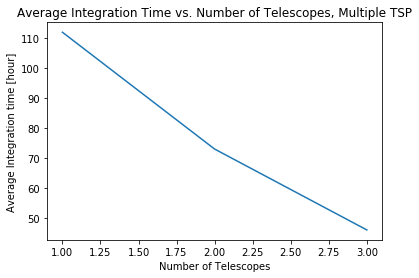

In [27]:
x = [1,2,3]
y = [1,2,3]
for i in range(3):
    y[i] = tsp_mean[i,1]
    
plt.plot(x,y)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes, Multiple TSP')

Text(0.5, 1.0, 'Average waiting Time vs. Number of Telescopes, Multiple TSP')

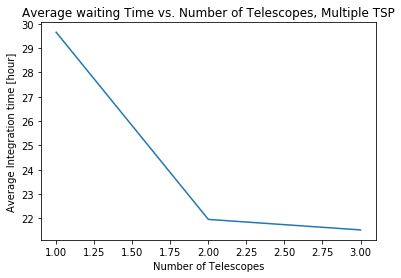

In [28]:
x = [1,2,3]
y = [1,2,3]
for i in range(3):
    y[i] = tsp_mean[i,3]
    
plt.plot(x,y)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average waiting Time vs. Number of Telescopes, Multiple TSP')

### Policy performance analysis using 3 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [7]:
policy = 'ShortestSlew3'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [30]:
policy = 'Random'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [31]:
policy = 'EarliestSetting'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [32]:
policy = 'tsp3'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

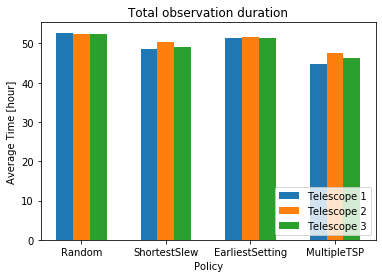

In [33]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend(loc = 'lower right')

#### Total slew time

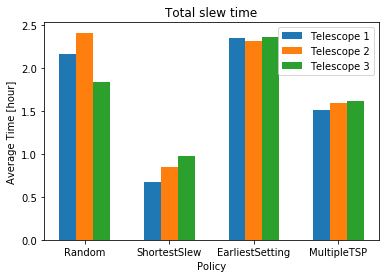

In [34]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,2], ShortestSlew_mean[0,2], EarliestSetting_mean[0,2], tsp_mean[0,2]]
y_2 = [Random_mean[1,2], ShortestSlew_mean[1,2], EarliestSetting_mean[1,2], tsp_mean[1,2]]
y_3 = [Random_mean[2,2], ShortestSlew_mean[2,2], EarliestSetting_mean[2,2], tsp_mean[2,2]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total slew time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend()

#### Total waiting time

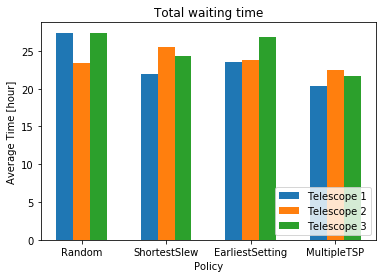

In [35]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,3], ShortestSlew_mean[0,3], EarliestSetting_mean[0,3], tsp_mean[0,3]]
y_2 = [Random_mean[1,3], ShortestSlew_mean[1,3], EarliestSetting_mean[1,3], tsp_mean[1,3]]
y_3 = [Random_mean[2,3], ShortestSlew_mean[2,3], EarliestSetting_mean[2,3], tsp_mean[2,3]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total waiting time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend(loc = 'lower right')

### The main influencing factor analysis of observation time
#### ShortestSlew Policy

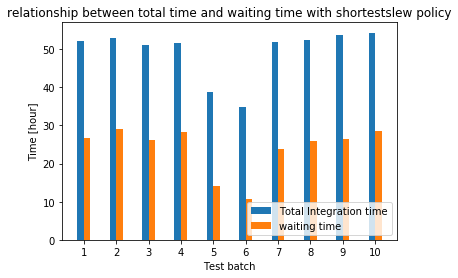

In [36]:
telescope_mean = np.mean(ShortestSlew_data, axis = 1)

x_data = [1,2,3,4,5,6,7,8,9,10]
y_total = [1,2,3,4,5,6,7,8,9,10]
y_slew = [1,2,3,4,5,6,7,8,9,10]
y_wait = [1,2,3,4,5,6,7,8,9,10]
y_obs = [1,2,3,4,5,6,7,8,9,10]
for i in range(0,10):
    y_total[i] = telescope_mean[i,1]
    y_slew[i] = telescope_mean[i,2]
    y_wait[i] = telescope_mean[i,3]
    y_obs[i] = telescope_mean[i,4]
    
x0_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x0_width]
x2_width = [i+0.1 for i in x0_width]

plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_wait,width=0.2,label="waiting time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and waiting time with shortestslew policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

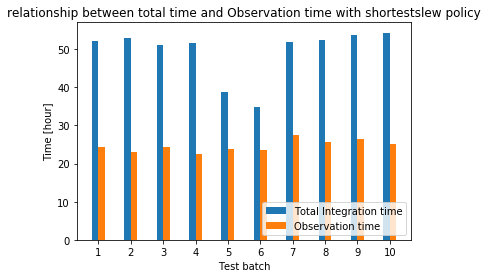

In [37]:
plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_obs,width=0.2,label="Observation time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and Observation time with shortestslew policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

#### MultipleTSP Policy

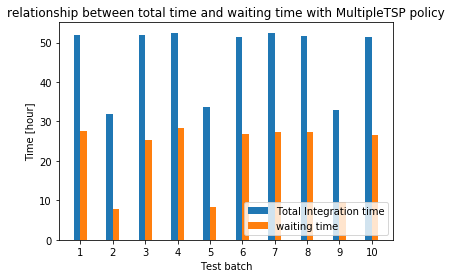

In [38]:
telescope_mean = np.mean(tsp_data, axis = 1)

x_data = [1,2,3,4,5,6,7,8,9,10]
y_total = [1,2,3,4,5,6,7,8,9,10]
y_slew = [1,2,3,4,5,6,7,8,9,10]
y_wait = [1,2,3,4,5,6,7,8,9,10]
y_obs = [1,2,3,4,5,6,7,8,9,10]
for i in range(0,10):
    y_total[i] = telescope_mean[i,1]
    y_slew[i] = telescope_mean[i,2]
    y_wait[i] = telescope_mean[i,3]
    y_obs[i] = telescope_mean[i,4]
    
x0_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x0_width]
x2_width = [i+0.1 for i in x0_width]

plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_wait,width=0.2,label="waiting time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and waiting time with MultipleTSP policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

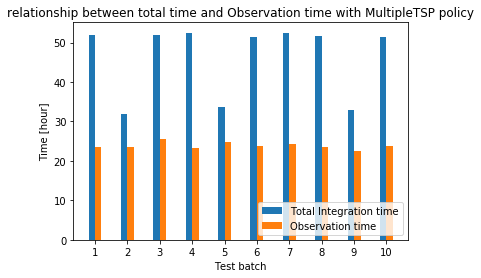

In [39]:
plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_obs,width=0.2,label="Observation time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and Observation time with MultipleTSP policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')